In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
df = pd.read_csv("data/Heart_Disease_Prediction.csv")
df.head()
df.columns

df["Heart Disease"] = df["Heart Disease"].map({
    "Absence": 0,
    "Presence": 1
})




In [16]:
class_counts = df["Heart Disease"].value_counts().sort_index()
class_props = df["Heart Disease"].value_counts(normalize=True).sort_index()

summary = pd.DataFrame({
    "Original Meaning": ["Absence", "Presence"],
    "Count": class_counts.values,
    "Proportion": class_props.values,
    "Percentage (%)": class_props.values * 100
}, index=class_counts.index)

summary.index.name = "Numeric Label"

summary.style \
    .format({
        "Proportion": "{:.4f}",
        "Percentage (%)": "{:.2f}%"
    }) \
    .set_table_styles([
        {"selector": "th", "props": [("border", "1px solid black"), ("text-align", "center")]},
        {"selector": "td", "props": [("border", "1px solid black"), ("text-align", "center")]},
        {"selector": "table", "props": [("border-collapse", "collapse")]}
    ])



,Original Meaning,Count,Proportion,Percentage (%)
Numeric Label,,,,
0,Absence,150,0.5556,55.56%
1,Presence,120,0.4444,44.44%


In [17]:
df.describe()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


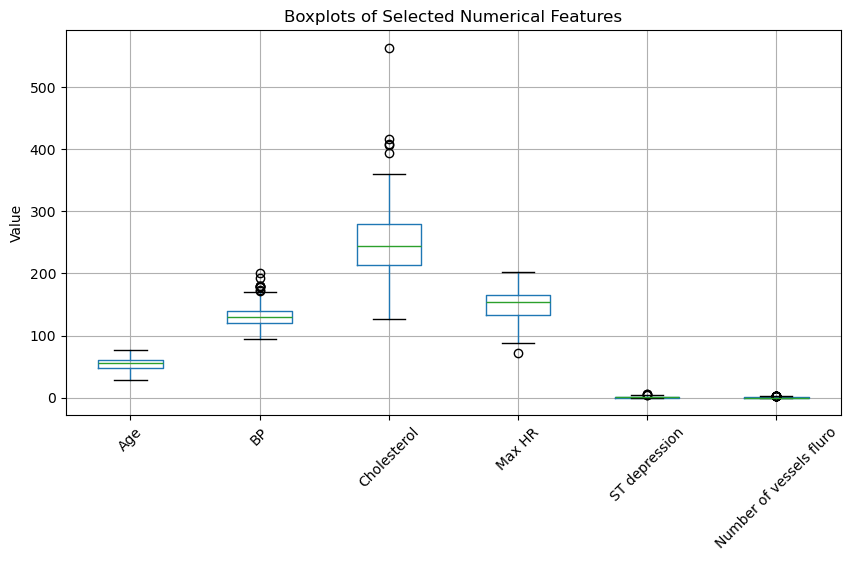

In [18]:
numeric_cols = [
    "Age",
    "BP",
    "Cholesterol",
    "Max HR",
    "ST depression",
    "Number of vessels fluro"
]

df[numeric_cols].boxplot(figsize=(10,5))
plt.xticks(rotation=45)
plt.title("Boxplots of Selected Numerical Features")
plt.ylabel("Value")
plt.show()



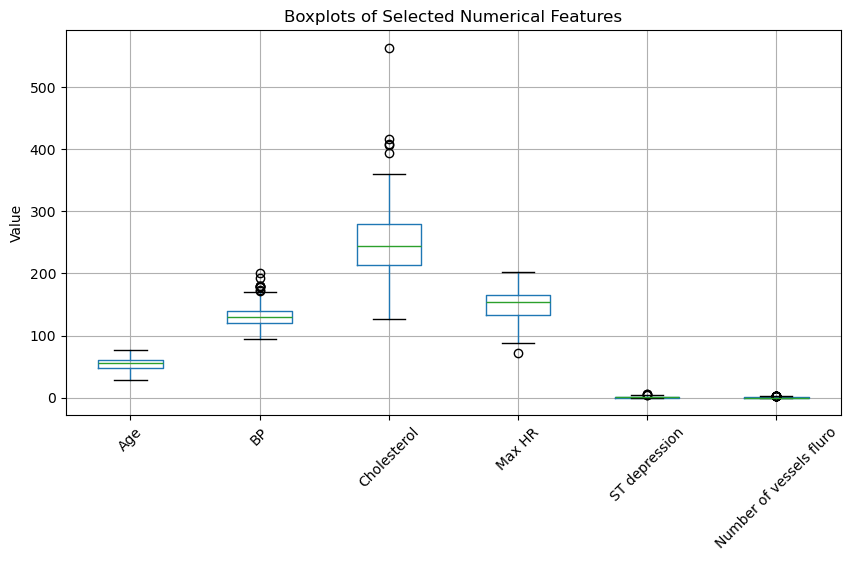

In [19]:
numeric_cols = [
    "Age",
    "BP",
    "Cholesterol",
    "Max HR",
    "ST depression",
    "Number of vessels fluro"
]

df[numeric_cols].boxplot(figsize=(10,5))
plt.xticks(rotation=45)
plt.title("Boxplots of Selected Numerical Features")
plt.ylabel("Value")
plt.show()


The boxplots show the presence of some extreme values in several features.
These values were not removed, as they may represent clinically meaningful
conditions and help preserve the natural variability of the data.


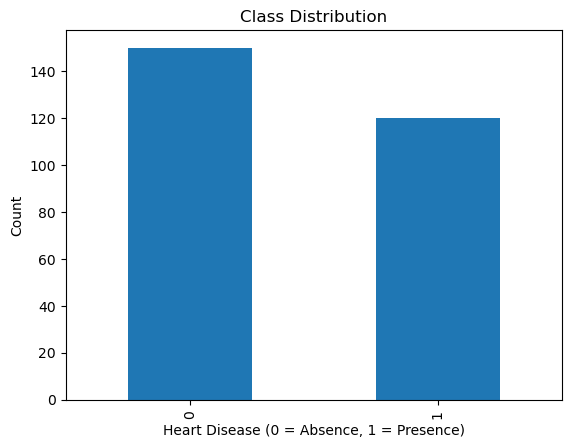

In [20]:
df["Heart Disease"].value_counts().plot(kind="bar")
plt.title("Class Distribution")
plt.xlabel("Heart Disease (0 = Absence, 1 = Presence)")
plt.ylabel("Count")
plt.show()


In [26]:
features = [
    "Age",
    "BP",
    "Cholesterol",
    "Max HR",
    "ST depression",
    "Number of vessels fluro"
]

X = df[features].values
y = df["Heart Disease"].values


In [27]:
def stratified_split(X, y, test_size=0.3, seed=42):
    np.random.seed(seed)

    idx_0 = np.where(y == 0)[0]
    idx_1 = np.where(y == 1)[0]

    test_0 = np.random.choice(idx_0, int(len(idx_0) * test_size), replace=False)
    test_1 = np.random.choice(idx_1, int(len(idx_1) * test_size), replace=False)

    test_idx = np.concatenate([test_0, test_1])
    train_idx = np.setdiff1d(np.arange(len(y)), test_idx)

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]


In [28]:
X_train, X_test, y_train, y_test = stratified_split(X, y)


In [29]:
def normalize_train_test(X_train, X_test):
    mu = X_train.mean(axis=0)
    sigma = X_train.std(axis=0)

    X_train_norm = (X_train - mu) / sigma
    X_test_norm = (X_test - mu) / sigma

    return X_train_norm, X_test_norm, mu, sigma


In [30]:
X_train_norm, X_test_norm, mu, sigma = normalize_train_test(
    X_train, X_test
)


In [31]:
print("Train size:", len(y_train))
print("Test size:", len(y_test))
print("Train positive rate:", y_train.mean())
print("Test positive rate:", y_test.mean())


Train size: 189
Test size: 81
Train positive rate: 0.4444444444444444
Test positive rate: 0.4444444444444444
